In [2]:
import pickle
import numpy as np

with (open("data_sensitive.pkl", "rb")) as openfile:
    while True:
        try:
            st = pickle.load(openfile)
        except EOFError:
            break
            
dokumen_train1 = repr(st)

with (open("data_nonsensitive.pkl", "rb")) as openfile:
    while True:
        try:
            st = pickle.load(openfile)
        except EOFError:
            break
            
dokumen_train2 = repr(st)

### print dokumen 

In [3]:
print (dokumen_train2)

[{'sensitive': False, 'text': 'Sahabatanehdidunia com jika berbicara soal prostitusi semua orang tahu bahwa hal tersebut adalah bagian dari bisnis aneh yang ada di dunia Disebut sebagai bisnis aneh karena bisnis prostitusi adalah bisnis yang memperdagangkan manusia melalui jasa esek esek Mungkin zaman dulu wanita adalah gender paling besar yang terlibat dari bisnis panas ini mulai dari mucikari hingga pekerja rata rata semua adalah wanita yang melayani pria hidung belang Namun seiring bertambahnya waktu bisnis ini juga banyak melibatkan pria tak hanya sebagai mucikari saja namun juga pria penjaja seks Di Indonesia dan beberapa kebanyakan negara negara di dunia bisnis prostitusi adalah termasuk bisnis yang illegal sehingga tidak diperbolehkan ada di negara tersebut Namun ada beberapa negara yang ternyata menganggap bisnis prostitusi legal dan bahkan berhak mendapatkan surat perijinan pembangungan tempat prostitusi di negara tersebut sama halnya dengan bisnis lainnya Malahan di beberapa 

Tiap dokumen dipecah menjadi masing masing artikel

In [11]:
import re
ss1 = re.findall(r"text': '(.*?)', 'title': '", dokumen_train1)
ss2 = re.findall(r"text': '(.*?)', 'title': '", dokumen_train2)

In [4]:
print (len(ss1))
print (len(ss2))

classes = []
for i in range (len(ss1)):
    tmp = [1,0]
    classes.append(tmp)
for i in range (len(ss2)):
    tmp = [0,1]
    classes.append(tmp)
#print (classes)

classes_ = []
for i in range (len(ss1)):
    classes_.append(0)
for i in range (len(ss2)):
    classes_.append(1)
    
ss = ss1 + ss2

2000
2000


Tiap artikel dipecah menjadi kata

In [5]:
paragraph = []
for i in range (len(ss)):
    wordList = re.sub("[^\w]", " ",  ss[i]).split()
    paragraph.append(wordList)
print (paragraph[2000][0])
print (len(paragraph))

Sahabatanehdidunia
4000


In [6]:
with open('np/positive.txt', 'r') as myfile:
    content_pos = myfile.readlines()
    content_pos = [x.strip() for x in content_pos] 
print (len(content_pos))

with open('np/negative.txt', 'r') as myfile:
    content_neg = myfile.readlines()
    content_neg = [x.strip() for x in content_neg] 
print (len(content_neg))

mergedlist = content_pos + content_neg
print (len(mergedlist))

1182
2401
3583


In [7]:
import numpy as np

feature_set = []

msg = "done for {0} paragraph"

for i in range (len(paragraph)):
    tmp = [0] * (len(mergedlist))
    for j in range (len(paragraph[i])):
        kata = paragraph[i][j]
        
        # mencari kata yang cocok dari tabel
        for k in range (len(mergedlist)):
            if mergedlist[k] == kata :
                tmp[k] += 1
        
    feature_set.append(tmp)
    #del tmp[:]
    print (msg.format(i+1), end='\r')

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transfer_values_reduced = pca.fit_transform(feature_set)


In [9]:
def plot_scatter(values, cls):
    # Create a color-map with a different color for each class.
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    cmap = cm.rainbow(np.linspace(0.0, 1.0, 2)) # 2 = num classes

    # Get the color for each sample.
    colors = cmap[cls]

    # Extract the x- and y-values.
    x = values[:, 0]
    y = values[:, 1]

    # Plot it.
    plt.scatter(x, y, color=colors)
    plt.show()

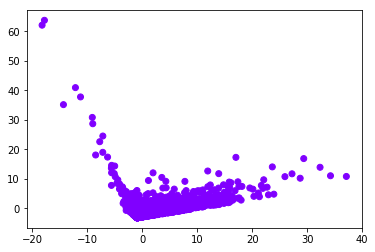

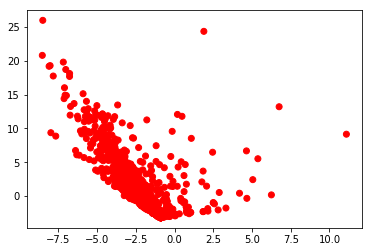

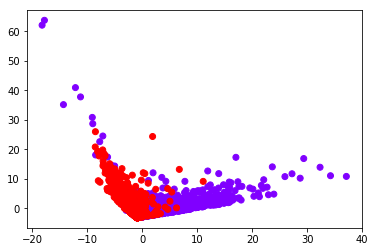

In [10]:
num_features = len(feature_set[0])
plot_scatter(transfer_values_reduced[0:2000], classes_[0:2000])
plot_scatter(transfer_values_reduced[2001:4000], classes_[2001:4000])
plot_scatter(transfer_values_reduced, classes_)

In [11]:
from sklearn.manifold import TSNE

pca = PCA(n_components=20)
transfer_values_50d =pca.fit_transform(feature_set)

tsne = TSNE(n_components=2)
reduced_features = tsne.fit_transform(transfer_values_50d)

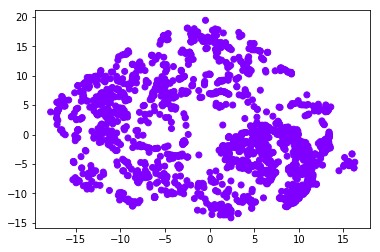

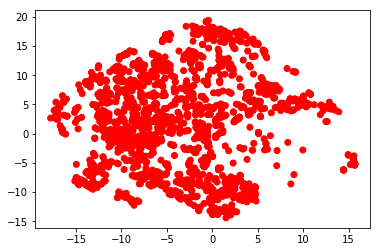

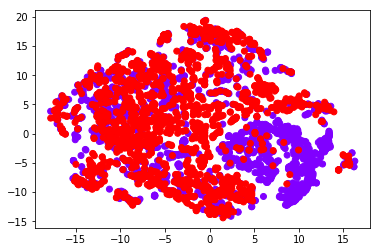

In [12]:
plot_scatter(reduced_features[0:2000], classes_[0:2000])
plot_scatter(reduced_features[2001:4000], classes_[2001:4000])
plot_scatter(reduced_features, classes_)

In [13]:
with (open("data_validation_sensitive.pkl", "rb")) as openfile:
    while True:
        try:
            st = pickle.load(openfile)
        except EOFError:
            break
            
dokumen_val1 = repr(st)

with (open("data_validation_nonsensitive.pkl", "rb")) as openfile:
    while True:
        try:
            st = pickle.load(openfile)
        except EOFError:
            break
            
dokumen_val2 = repr(st)

In [14]:
import re
ss_val1 = re.findall(r"text': '(.*?)', 'title", dokumen_val1)
ss_val2 = re.findall(r"text': '(.*?)', 'title", dokumen_val2)

print (len(ss_val1))
print (len(ss_val2))

classes_val = []
for i in range (len(ss_val1)):
    tmp = [1,0]
    classes_val.append(tmp)
for i in range (len(ss_val2)):
    tmp = [0,1]
    classes_val.append(tmp)
#print (classes)

classes_val_ = []
for i in range (len(ss_val1)):
    classes_val_.append(0)
for i in range (len(ss_val2)):
    classes_val_.append(1)
    
ss_val = ss_val1 + ss_val2

paragraph_val = []
for i in range (len(ss_val)):
    wordList = re.sub("[^\w]", " ",  ss_val[i]).split()
    paragraph_val.append(wordList)
    
    
print ('------ features extraction --------')

feature_set_val = []

msg = "done for {0} paragraph"

for i in range (len(paragraph_val)):
    tmp = [0] * (len(mergedlist))
    for j in range (len(paragraph_val[i])):
        kata = paragraph_val[i][j]
        
        # mencari kata yang cocok dari tabel
        for k in range (len(mergedlist)):
            if mergedlist[k] == kata :
                tmp[k] += 1
        
    feature_set_val.append(tmp)
    #del tmp[:]
    print (msg.format(i+1), end='\r')


500
500
------ features extraction --------


## Training with ANN (tensorflow)

In [22]:
import tensorflow as tf

#dropout = 0.75

the_classes = np.array(['sensitive', 'nonsensitive'])
num_classes = len(the_classes)
num_sample = len(feature_set)
                   
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))
def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

def new_fc_layer(input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,    # Num. outputs.
                 use_relu=True): # Use Rectified Linear Unit (ReLU)?

    # Create new weights and biases.
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases

    # Use ReLU?
    if use_relu:
        layer = tf.nn.relu(layer)

    return layer

feature_size_flat = num_features
x = tf.placeholder(tf.float32, shape=[None, feature_size_flat], name='x')
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)


layer_fc1 = new_fc_layer(input= x,
                         num_inputs=num_features,
                         num_outputs=1000,
                         use_relu=True)
#layer_fc1 = tf.nn.dropout(layer_fc1, dropout)
layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=1000,
                         num_outputs=num_classes,
                         use_relu=False)
#layer_fc2 = tf.nn.dropout(layer_fc2, dropout)
y_pred = tf.nn.softmax(layer_fc2)
y_pred_cls = tf.argmax(y_pred, dimension=1)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2,
                                                        labels=y_true)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [23]:
train_acc = []
val_acc = []
val_loss = []

In [26]:
import time
from datetime import timedelta
from sklearn.utils import shuffle

session = tf.Session()
session.run(tf.global_variables_initializer())
save_path = "the_model/opinion_model"
saver = tf.train.Saver()

train_batch = 250

def optimize(num_iterations):
    global feature_set
    global classes
    global feature_set_val
    global classes_val
    
    # Start-time used for printing time-usage below.
    start_time = time.time()
    
    best_acc_val = 0.0
    
    batch_ke = 0

    for i in range(num_iterations):
        batch_ke += 1
       
        if (batch_ke * train_batch > num_sample ):
            batch_ke = 1
            feature_set, classes = shuffle(feature_set, classes)
            
        batas_bawah = (batch_ke - 1) * train_batch
        batas_atas = batch_ke * train_batch
        x_batch = feature_set[batas_bawah : batas_atas]
        y_batch = classes[batas_bawah : batas_atas]
            
        feed_dict_train = {x: x_batch,
                           y_true: y_batch}
        
        session.run(optimizer, feed_dict=feed_dict_train)
        
        # Print the accuracy.
        msg = "eopch: {0:>6}, train accuracy:{1:>6.1%}, val accuracy:{2:>6.1%} {3}"

        # Print status at end of each epoch (defined as full pass through training dataset).
        if i % 1 == 0:
            acc = session.run(accuracy, feed_dict=feed_dict_train)
            
            ## testing model
            acc_val = 0
            for j in range(4):
                batas_bawah = j * train_batch
                batas_atas = (j + 1) * train_batch
                x_batch_val = feature_set_val[batas_bawah : batas_atas]
                y_batch_val = classes_val[batas_bawah : batas_atas]
                feed_dict_val = {x: x_batch_val,
                        y_true: y_batch_val}
                acc_val += session.run(accuracy, feed_dict=feed_dict_val)
                    
            acc_val = acc_val/4
            
            # appending list
            train_acc.append(acc)
            val_acc.append(acc_val)
            
            if (acc_val > best_acc_val) :
                saver.save(sess=session, save_path=save_path)
                best_acc_val = acc_val
                sign = "*"
                print (msg.format(i,acc, acc_val, sign))
                
            else:
                sign = "-"
                print (msg.format(i, acc, acc_val, sign))

    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time elapsed: " + str(timedelta(seconds=int(round(time_dif)))))

In [27]:
optimize(num_iterations=2000)

eopch:      0, train accuracy: 56.4%, val accuracy: 51.4% *
eopch:      1, train accuracy: 60.0%, val accuracy: 55.0% *
eopch:      2, train accuracy: 56.0%, val accuracy: 58.7% *
eopch:      3, train accuracy: 62.0%, val accuracy: 61.6% *
eopch:      4, train accuracy: 67.6%, val accuracy: 63.4% *
eopch:      5, train accuracy: 71.2%, val accuracy: 66.5% *
eopch:      6, train accuracy: 68.4%, val accuracy: 68.1% *
eopch:      7, train accuracy: 66.4%, val accuracy: 69.8% *
eopch:      8, train accuracy: 65.2%, val accuracy: 70.9% *
eopch:      9, train accuracy: 74.8%, val accuracy: 72.4% *
eopch:     10, train accuracy: 79.6%, val accuracy: 74.3% *
eopch:     11, train accuracy: 79.6%, val accuracy: 75.6% *
eopch:     12, train accuracy: 80.8%, val accuracy: 76.1% *
eopch:     13, train accuracy: 80.4%, val accuracy: 77.0% *
eopch:     14, train accuracy: 78.4%, val accuracy: 77.4% *
eopch:     15, train accuracy: 78.0%, val accuracy: 77.7% *
eopch:     16, train accuracy: 81.6%, va

## yeah, Akurasi validasi maksimum mencapai 90.4%, lihat epoch ke: 513 - 531.

Setelah itu sepertinya model telah overfit.

In [32]:
print ('max val accuracy:')
print (max(val_acc))

max val accuracy:
0.903999999166


### Plot Grafik Training

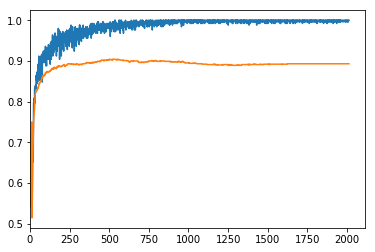

In [33]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlim(1)
plt.show()

### Plot Confusion Matrix

In [47]:
num_val = len(feature_set_val)
x_batch = feature_set_val[0:num_val]
y_batch = classes_val[0:num_val]
feed_dict={x:x_batch, y_true: y_batch}

prediction_val = session.run(y_pred_cls, feed_dict = feed_dict)

In [60]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title = 'Confusion Matrix', cmap= plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation =45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print ('normalizet confusion matrix')
    else:
        print ('without normalization confusion matrix')
    print (cm)
    
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], 
                 horizontalalignment="center", 
                 color = "white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')

without normalization confusion matrix
[[448  52]
 [ 55 445]]


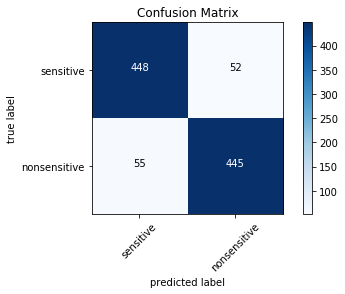

In [61]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(classes_val_, prediction_val)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=the_classes, title ='Confusion Matrix')
plt.show()